In [ ]:
import numpy as np
import pandas as pd
import altair as alt
import statsmodels.api as sm

[Statistical Appendix](https://happiness-report.s3.amazonaws.com/2023/WHR+23_Statistical_Appendix.pdf)

Contains Data Sources and Variable Descriptions

## Code Appendix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/Shareddrives/F23 PSTAT 100/whr-2023.csv')
data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [ ]:
data_subset = data[['Country name', 'year','Life Ladder', 'Log GDP per capita', 'Positive affect', 'Negative affect']]
data_subset
data_subset.isna().sum()

Country name           0
year                   0
Life Ladder            0
Log GDP per capita    20
Positive affect       24
Negative affect       16
dtype: int64

In [ ]:
rows_with_na = data_subset[data_subset.isnull().any(axis=1)]
rows_with_na.head

,Country name,year,Life Ladder,Log GDP per capita,Positive affect,Negative affect
13,Afghanistan,2022,1.281,NaN,0.206,0.576
29,Algeria,2010,5.464,9.306,NaN,NaN
126,Bahrain,2014,6.165,10.802,NaN,NaN
140,Bangladesh,2014,4.636,8.323,NaN,0.231
151,Belarus,2008,5.463,9.677,NaN,0.246


(array([  9.,  33.,  47., 100., 157., 195., 209., 221., 207., 209., 176.,
        126., 121.,  89.,  85.,  56.,  46.,  36.,  16.,  15.,   8.,   5.,
          6.,   4.,   3.,   2.,   0.,   1.,   0.,   1.]),
 array([0.083     , 0.10373333, 0.12446667, 0.1452    , 0.16593333,
        0.18666667, 0.2074    , 0.22813333, 0.24886667, 0.2696    ,
        0.29033333, 0.31106667, 0.3318    , 0.35253333, 0.37326667,
        0.394     , 0.41473333, 0.43546667, 0.4562    , 0.47693333,
        0.49766667, 0.5184    , 0.53913333, 0.55986667, 0.5806    ,
        0.60133333, 0.62206667, 0.6428    , 0.66353333, 0.68426667,
        0.705     ]),
 <BarContainer object of 30 artists>)

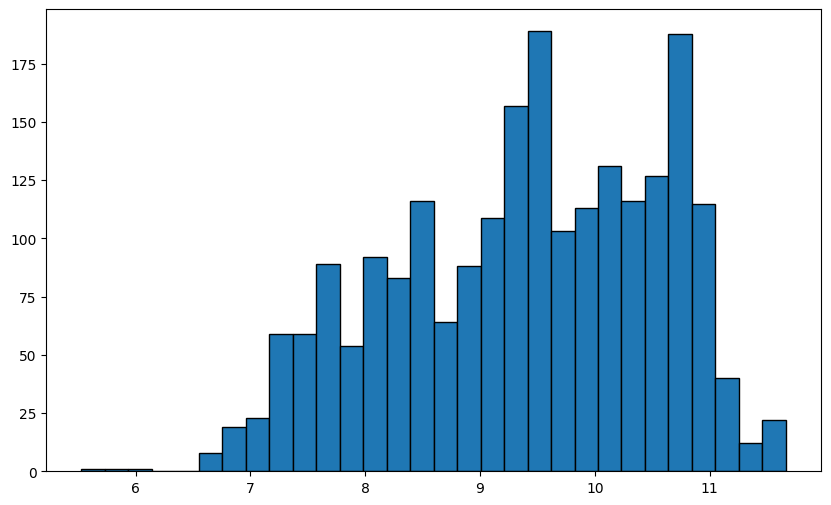

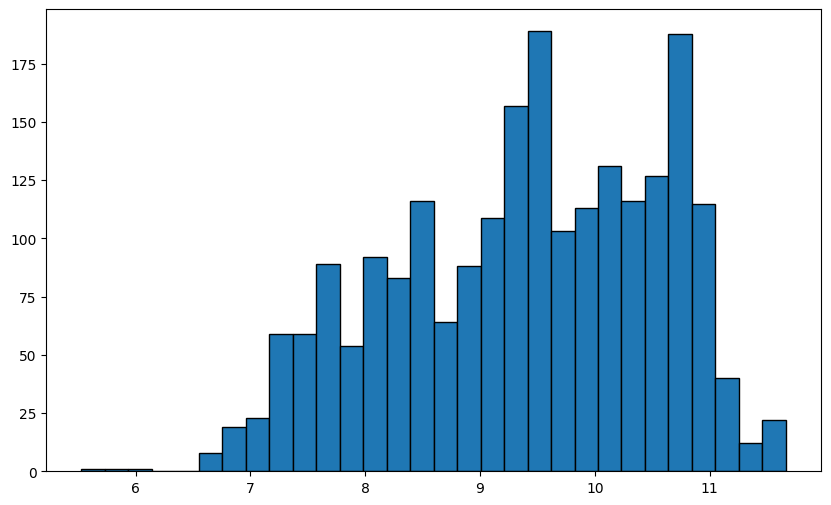

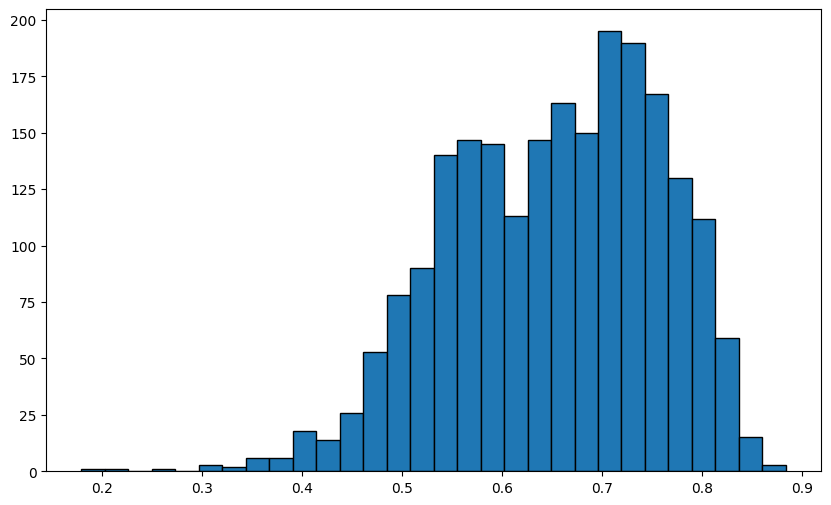

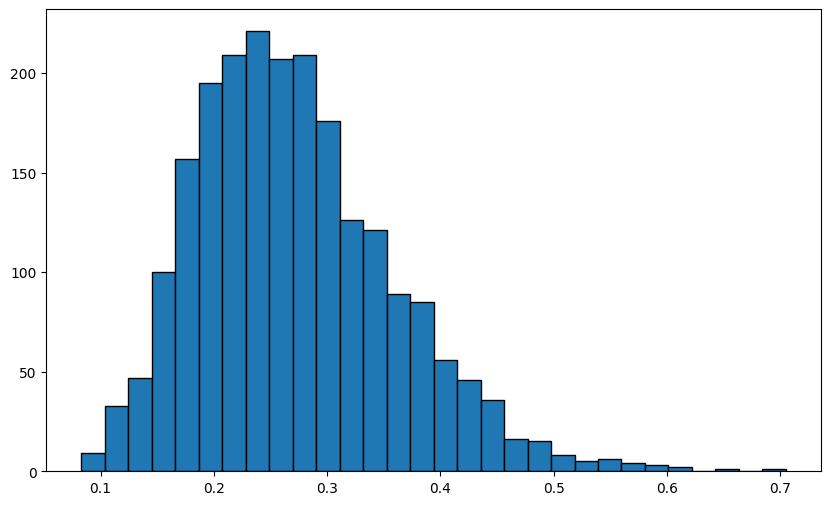

In [ ]:
#log GDP distribution
plt.figure(figsize=(10, 6))
plt.hist(data_subset['Log GDP per capita'], bins=30, edgecolor='black')

#log GDP distribution
plt.figure(figsize=(10, 6))
plt.hist(data_subset['Log GDP per capita'], bins=30, edgecolor='black')

#log GDP distribution
plt.figure(figsize=(10, 6))
plt.hist(data_subset['Positive affect'], bins=30, edgecolor='black')

#log GDP distribution
plt.figure(figsize=(10, 6))
plt.hist(data_subset['Negative affect'], bins=30, edgecolor='black')

# Course project guidelines



A good question is one that you want to answer. It should be a question with contextual meaning, not a purely technical matter. It should be clear enough to answer, but not so specific or narrow that your analysis is a single line of code. It should require you to do some nontrivial exploratory analysis, descriptive analysis, and possibly some statistical modeling. You aren't required to use any specific methods, but it should take a bit of work to answer the question. There may be multiple answers or approaches to contrast based on different ways of interpreting the question or different ways of analyzing the data. If your question is answerable in under 15 minutes, or your answer only takes a few sentences to explain, the question probably isn't nuanced enough.



## Deliverable

Prepare and submit a jupyter notebook that summarizes your work. Your notebook should contain the following sections/contents:

* **Data description**: write up a short summary of the dataset you chose to work with following the conventions introduced in previous assignments. Cover the sampling if applicable and data semantics, but focus on providing high-level context and not technical details; don't report preprocessing steps or describe tabular layouts, etc.
* **Question of interest**: motivate and formulate your question; explain what a satisfactory answer might look like.
* **Data analysis**: provide a walkthrough with commentary of the steps you took to investigate and answer the question. This section can and should include code cells and text cells, but you should try to focus on presenting the analysis clearly by organizing cells according to the high-level steps in your analysis so that it is easy to skim. For example, if you fit a regression model, include formulating the explanatory variable matrix and response, fitting the model, extracting coefficients, and perhaps even visualization all in one cell; don't separate these into 5-6 substeps.
* **Summary of findings**: answer your question by interpreting the results of your analysis, referring back as appropriate. This can be a short paragraph or a bulleted list.

## Evaluation

Your work will be evaluated on the following criteria:

1. Thoughtfulness: does your question reflect some thoughtful consideration of the dataset and its nuances, or is it more superficial?
2. Thoroughness: is your analysis an end-to-end exploration, or are there a lot of loose ends or unexplained choices?
3. Mistakes or oversights: is your work free from obvious errors or omissions, or are there mistakes and things you've overlooked?
4. Clarity of write-up: is your report well-organized with commented codes and clear writing, or does it require substantial effort to follow?

# MP Data Description Questions for reference

##MP1
### Part I

Merge the city information with the air quality data and tidy the dataset (see notes below). Write a one- to two-paragraph description of the data.

In your description, answer the following questions:

- What is a CBSA (the geographic unit of measurement)?
- How many CBSA's are included in the data?
- In how many states and territories do the CBSA's reside? (*Hint: `str.split()`*)
- In which years were data values recorded?
- How many observations are recorded?
- How many variables are measured?
- Which variables are non-missing most of the time (*i.e.*, in at least 50% of instances)?
- What is PM 2.5 and why is it important?
- What are the basic statistical properties of the variable(s) of interest?

Please write your description in narrative fashion; _**please do not list answers to the questions above one by one**_.

##MP 2
### Part I

Merge the city information with the air quality data and tidy the dataset (see notes below). Write a one- to two-paragraph description of the data.

In your description, answer the following questions:

- What is a CBSA (the geographic unit of measurement)?
- How many CBSA's are included in the data?
- In how many states and territories do the CBSA's reside? (*Hint: `str.split()`*)
- In which years were data values recorded?
- How many observations are recorded?
- How many variables are measured?
- Which variables are non-missing most of the time (*i.e.*, in at least 50% of instances)?
- What is PM 2.5 and why is it important?
- What are the basic statistical properties of the variable(s) of interest?

Please write your description in narrative fashion; _**please do not list answers to the questions above one by one**_.